In [2]:
import pandas as pd
import os
import gzip #(open compressed file)
import json #(open our json file
import pickle#( we use it to save our model as a file)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler #( resampling data oversample)
from imblearn.under_sampling import RandomUnderSampler#(resampling data over sample) 
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
dfb = pd.read_excel(r"C:\Users\User\banckrucpcy in poland/bankruptcy-in-poland project 5 (Recovered).xlsx")

In [4]:
print(dfb.shape)
dfb.head()

(33, 66)


company_id    feat_1   feat_2   feat_3   feat_4    feat_5   feat_6  \
0           1  0.174190  0.17419  0.17419  0.17419   0.17419  0.17419   
1           2  0.146240  0.46038  0.28230  1.62940   2.59520  0.00000   
2           3  0.000595  0.22612  0.48839  3.15990  84.87400  0.19114   
3           5  0.188290  0.41504  0.34231  1.92790 -58.27400  0.00000   
4           6  0.182060  0.55615  0.32191  1.60450  16.31400  0.00000   

     feat_7   feat_8   feat_9  ...   feat_56   feat_57  feat_58   feat_59  \
0  0.174190  0.17419  0.17419  ...  0.174190  0.174190  0.17419  0.174190   
1  0.171850  1.17210  1.60180  ...  0.027516  0.271000  0.90108  0.000000   
2  0.004572  2.98810  1.00770  ...  0.007639  0.000881  0.99236  0.000000   
3  0.233580  1.40940  1.33930  ...  0.176480  0.321880  0.82635  0.073039   
4  0.182060  0.79808  1.81260  ...  0.555770  0.410190  0.46957  0.029421   

   feat_60  feat_61    feat_62  feat_63   feat_64  bankrupt  
0  0.17419  0.17419    0.17419  0.17419   0.17419     False  
1  5.98820  4.11030  102.19000  3.57160   5.95000     False  
2  6.77420  3.79220   64.84600  5.62870   4.45810     False  
3  2.59120  7.07560  100.54000  3.63030   4.63750     False  
4  8.45530  3.34880  107.24000  3.40360  12.45400      True  

[5 rows x 66 columns]

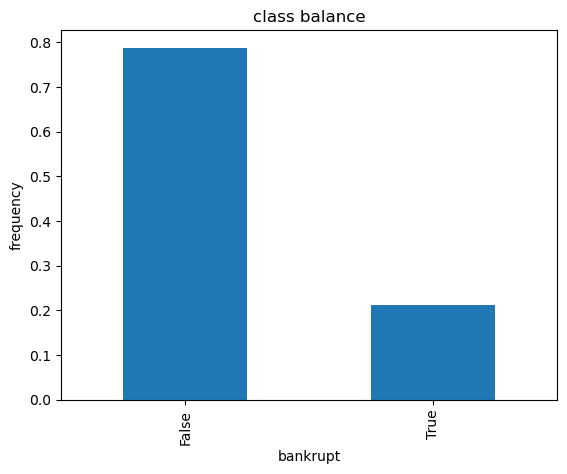

In [5]:
# plot class balance for our predicton.
#Task 5.2.3: Create a bar chart of the value counts for the "bankrupt" column. 
#You want to calculate the relative frequencies of the classes, not the raw count, so be sure to set the normalize argument to True.



dfb["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="frequency",
    title="class balance"
);


In [1]:

#this is important

# positive is true our model 
#class 0 is negative class(non severe damage)(majority class)


#we are developing a model to make prediction on eeither yes or no 
#if our  model made a prediction as yes the there will be bankrupcy which is true (positive class)
#if our  model  made a prediction as no the there will be no bankrupcy which is false( negative class)


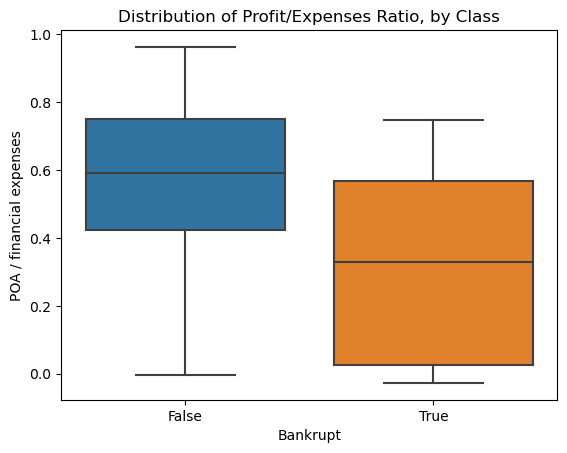

In [7]:
#feature box plot, let take a look at feature 10, let investigate the feature. we are doing it for feature 10 alone cos the data in the project is big

#Task 5.2.4: Use seaborn to create a boxplot that shows the distributions of the "feat_10" column for both groups in the "bankrupt" column. 
#Remember to label your axes.


# Create boxplot
sns.boxplot(x="bankrupt",y="feat_10", data=dfb)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");





In [9]:
#Task 5.2.5: Use the describe method on the column for "feat_27". What can you tell about the distribution of the data based on the mean and median?
# Summary statistics for `feat_10`
dfb["feat_10"].describe()
#dfb["feat_10"].describe().apply("{0:.0f}".format)#( to remove exponential or standard form)

count    33.000000
mean      0.513897
std       0.273049
min      -0.026971
25%       0.329340
50%       0.584960
75%       0.747210
max       0.963340
Name: feat_10, dtype: float64

In [10]:
# 50th( median) it  means  50% of our compamy is below 1 and 50 % above 1 are .. according to the data comapny below 1 are not making profit vice versa
# the minimum and maximum is far from each other . the company on the minimuim are losing vice versa. that is a skewed data
# median 
# 50% are making money while 50% are losing yet the distribution differs.
# when there is a big differnce between mean and median we have skewed data

# actuall this data is not really skewed but the one in the tutorial is

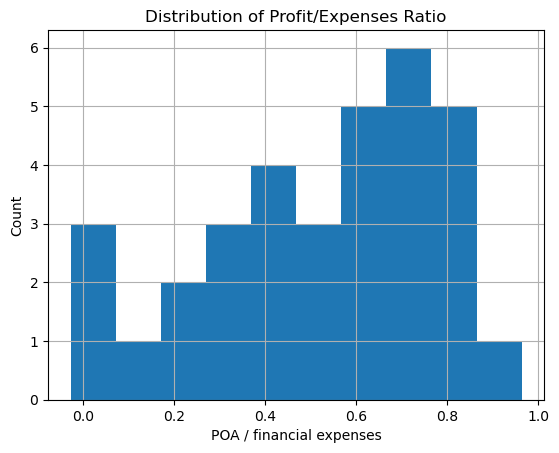

In [11]:
#Task 5.2.6: Create a histogram of "feat_10". 
#Make sure to label x-axis "POA / financial expenses", the y-axis "Count", and use the title "Distribution of Profit/Expenses Ratio".

# Plot histogram of `feat_10`
dfb["feat_10"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

In [12]:
dfb["feat_10"].quantile([0.1,0.9])

0.1     0.000
0.9    44.947
Name: feat_27, dtype: float64

In [17]:
dfb["feat_10"].quantile([0.1,0.9])
mask=dfb["feat_10"].between(q1, q9)
mask.head(5)

0    True
1    True
2    True
3    True
4    True
Name: feat_10, dtype: bool

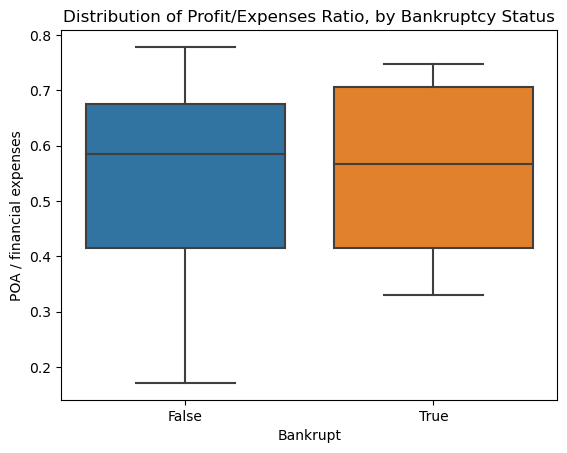

In [14]:
# if the mean and median are too differnt we must clip it......
#Aha! We saw it in the numbers and now we see it in the histogram. The data is very skewed ( data for the project actually). So, in order to create a helpful boxplot, we need to trim the data.

#Task 5.2.7: Recreate the boxplot that you made above, this time only using the values for "feat_10" that fall between the 0.1 and 0.9 quantiles for the column.

# Create clipped boxplot
q1, q9 = dfb["feat_10"].quantile([0.1,0.9])
mask=dfb["feat_10"].between(q1, q9)
sns.boxplot(x="bankrupt", y="feat_10", data=dfb[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

In [18]:
#Task 5.2.8: Repeat the exploration you just did for "feat_10" on two other features in the dataset. Do they show the same skewed distribution? 
#Are there large differences between bankrupt and solvent companies?

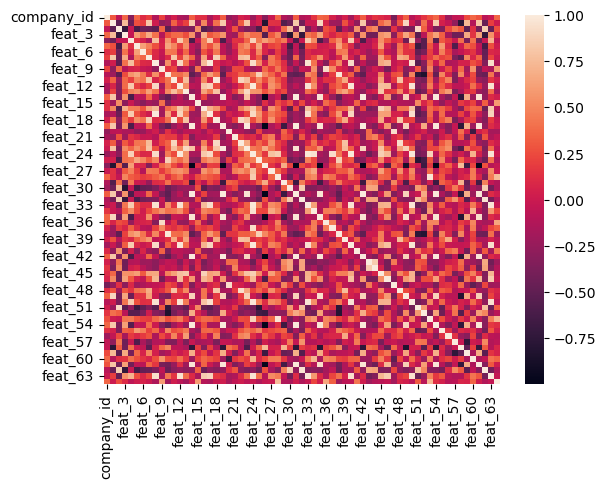

In [19]:
#Task 5.2.9: Plot a correlation heatmap of features in df. Since "bankrupt" will be your target, you don't need to include it in your heatmap.
corr = dfb.drop(columns="bankrupt").corr()
sns.heatmap(corr);
# we drop bankrupt because its our target

In [21]:
 dfb.drop(columns="bankrupt").corr()

company_id    feat_1    feat_2    feat_3    feat_4    feat_5  \
company_id    1.000000  0.304287 -0.055038  0.355706 -0.316265  0.354882   
feat_1        0.304287  1.000000 -0.517782  0.751374 -0.450281  0.263492   
feat_2       -0.055038 -0.517782  1.000000 -0.728784 -0.035099 -0.621245   
feat_3        0.355706  0.751374 -0.728784  1.000000 -0.036062  0.594888   
feat_4       -0.316265 -0.450281 -0.035099 -0.036062  1.000000  0.136942   
...                ...       ...       ...       ...       ...       ...   
feat_60       0.365228 -0.112408  0.118654  0.142218  0.396677  0.262118   
feat_61       0.273662  0.792345 -0.418536  0.616306 -0.425748 -0.060310   
feat_62      -0.087035 -0.463713  0.839870 -0.740905 -0.018421 -0.628794   
feat_63      -0.010876  0.189105 -0.473684  0.548177  0.704594  0.260926   
feat_64       0.352230  0.003802  0.251944  0.101959 -0.065322  0.010428   

              feat_6    feat_7    feat_8    feat_9  ...   feat_55   feat_56  \
company_id  0.109814  0.191184 -0.125158  0.199790  ...  0.127101 -0.215900   
feat_1      0.194265  0.810443  0.020076 -0.283743  ...  0.043925 -0.047211   
feat_2     -0.441712 -0.457452 -0.511753  0.351117  ... -0.355308  0.240680   
feat_3      0.409824  0.665502  0.401993 -0.117117  ...  0.333637 -0.175209   
feat_4      0.043001 -0.140732  0.765799  0.039846  ...  0.299887  0.177223   
...              ...       ...       ...       ...  ...       ...       ...   
feat_60     0.154941  0.076819  0.261699  0.559021  ...  0.126512  0.216799   
feat_61    -0.084557  0.342730  0.159836 -0.387816  ... -0.103505 -0.363085   
feat_62    -0.482556 -0.454911 -0.340429 -0.058457  ... -0.402702  0.098376   
feat_63     0.093205  0.219307  0.929724 -0.150563  ...  0.294063 -0.070558   
feat_64     0.061092 -0.006048 -0.145452  0.594238  ...  0.046449 -0.100818   

             feat_57   feat_58   feat_59   feat_60   feat_61   feat_62  \
company_id -0.047979 -0.031601  0.247983  0.365228  0.273662 -0.087035   
feat_1     -0.276480 -0.769897  0.737005 -0.112408  0.792345 -0.463713   
feat_2      0.429359  0.311309 -0.528249  0.118654 -0.418536  0.839870   
feat_3     -0.436156 -0.425576  0.663296  0.142218  0.616306 -0.740905   
feat_4     -0.022075  0.395281 -0.387991  0.396677 -0.425748 -0.018421   
...              ...       ...       ...       ...       ...       ...   
feat_60     0.008818  0.194568 -0.156707  1.000000 -0.147530 -0.060670   
feat_61    -0.046971 -0.724365  0.677609 -0.147530  1.000000 -0.324095   
feat_62     0.513926  0.308500 -0.529391 -0.060670 -0.324095  1.000000   
feat_63    -0.119778 -0.106131  0.142197  0.414997  0.298748 -0.409055   
feat_64    -0.077239  0.077524  0.061442  0.350747  0.017832 -0.118077   

             feat_63   feat_64  
company_id -0.010876  0.352230  
feat_1      0.189105  0.003802  
feat_2     -0.473684  0.251944  
feat_3      0.548177  0.101959  
feat_4      0.704594 -0.065322  
...              ...       ...  
feat_60     0.414997  0.350747  
feat_61     0.298748  0.017832  
feat_62    -0.409055 -0.118077  
feat_63     1.000000 -0.031293  
feat_64    -0.031293  1.000000  

[65 rows x 65 columns]

In [23]:
#VERY IMPORTANT WITH REGARD TO PROJECT DATA

#So what did we learn from this EDA? First, our data is imbalanced. This is something we need to address in our data preparation. 
#Second, many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. 
#Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.


#if OUR FEATURE IS HIGHLY SKEWEED WE USE MEDIAN AS BEST IMPUTATION STRATEGY

In [27]:
#Split.....
#So let's start building that model. If you need a refresher on how and why we split data in these situations, take a look back at the Time Series module.

#Task 5.2.10: Create your feature matrix X and target vector y. Your target is "bankrupt".


target = "bankrupt"
X = dfb.drop(columns=[target])
y = dfb[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (33, 65)
y shape: (33,)


In [ ]:
# note that we divide our data into training and test set before any oversampling or undersampling 9 RESAMPLING), this is because we want our test data is 100% from our data
# every changes we made is on our training data( resampling: over or undersample), we didnt touch our TEST DATA at all

In [28]:
#Task 5.2.11: Divide your data (X and y) into training and test sets using a randomized train-test split. 
#Your validation set should be 20% of your total data. And don't forget to set a random_state for reproducibility.
#In order to make sure that our model can generalize, we need to put aside a test set that we'll use to evaluate our model once it's trained.

#Task 5.2.11: Divide your data (X and y) into training and test sets using a randomized train-test split. Your validation set should be 20% of your total data. 
#And don't forget to set a random_state for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26, 65)
y_train shape: (26,)
X_test shape: (7, 65)
y_test shape: (7,)


In [25]:
#Note that if we wanted to tune any hyperparameters for our model, we'd do another split here, further dividing the training set into training and validation sets.
#However, we're going to leave hyperparameters for the next lesson, so no need to do the extra split now.

In [ ]:
#Resample
#Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data. (This will be different than the resampling we did with time series data in Project 3.)
#There are many to do this, so let's start with under-sampling.

In [29]:
#Task 5.2.12: Create a new feature matrix X_train_under and target vector y_train_under by performing random under-sampling on your training data.
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under =under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(10, 65)


company_id    feat_1   feat_2    feat_3   feat_4   feat_5    feat_6  \
0          23  0.029986  0.79448 -0.014255  0.97797 -39.9960 -0.119500   
1          34  0.057159  0.72184  0.384100  1.65330  32.6060  0.000000   
2          20  0.090415  0.46854  0.445050  2.20610  37.2570  0.005443   
3          14  0.081951  0.24608  0.312730  3.56540  29.4500  0.011692   
4           2  0.146240  0.46038  0.282300  1.62940   2.5952  0.000000   

     feat_7   feat_8  feat_9  ...  feat_55   feat_56  feat_57  feat_58  \
0  0.029986  0.21561  1.0840  ...  -1765.4  0.077483  0.17505  0.92252   
1  0.069934  0.38535  2.4997  ...  37151.0  0.037272  0.20549  0.97232   
2  0.113600  1.13430  2.0398  ...   6306.8  0.064679  0.17012  0.94475   
3  0.094949  3.06380  1.1117  ...  23101.0  0.100510  0.10870  0.89949   
4  0.171850  1.17210  1.6018  ...   3387.8  0.027516  0.27100  0.90108   

    feat_59  feat_60  feat_61  feat_62  feat_63  feat_64  
0  0.859700  11.6860   1.6914  253.410   1.4403   2.5398  
1  0.000000  15.0710   5.1537   85.842   4.2520  89.2440  
2  0.008381   9.6029   4.6214   66.027   5.5281  10.9690  
3  0.164700   4.0245   7.2449   52.022   7.0163   1.5129  
4  0.000000   5.9882   4.1103  102.190   3.5716   5.9500  

[5 rows x 65 columns]

In [ ]:
# there is no enough information let do oversample

In [30]:
#Task 5.2.13: Create a new feature matrix X_train_over and target vector y_train_over by performing random over-sampling on your training data.

over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(42, 65)


company_id    feat_1   feat_2    feat_3   feat_4    feat_5    feat_6  \
0          23  0.029986  0.79448 -0.014255  0.97797 -39.99600 -0.119500   
1          14  0.081951  0.24608  0.312730  3.56540  29.45000  0.011692   
2           1  0.174190  0.17419  0.174190  0.17419   0.17419  0.174190   
3           6  0.182060  0.55615  0.321910  1.60450  16.31400  0.000000   
4          18  0.093880  0.24891  0.374170  2.50320  35.00600  0.084199   

     feat_7   feat_8   feat_9  ...      feat_55   feat_56  feat_57  feat_58  \
0  0.029986  0.21561  1.08400  ...  -1765.40000  0.077483  0.17505  0.92252   
1  0.094949  3.06380  1.11170  ...  23101.00000  0.100510  0.10870  0.89949   
2  0.174190  0.17419  0.17419  ...      0.17419  0.174190  0.17419  0.17419   
3  0.182060  0.79808  1.81260  ...   2080.60000  0.555770  0.41019  0.46957   
4 -0.089098  3.00210  0.92569  ...   8843.10000 -0.080281 -0.12563  1.08030   

    feat_59   feat_60  feat_61    feat_62  feat_63   feat_64  
0  0.859700  11.68600  1.69140  253.41000  1.44030   2.53980  
1  0.164700   4.02450  7.24490   52.02200  7.01630   1.51290  
2  0.174190   0.17419  0.17419    0.17419  0.17419   0.17419  
3  0.029421   8.45530  3.34880  107.24000  3.40360  12.45400  
4  0.000000   7.02740  7.09320   59.90400  6.09310   4.02380  

[5 rows x 65 columns]

In [31]:
#Baseline
#As always, we need to establish the baseline for our model. Since this is a classification problem, we'll use accuracy score.


acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))


Baseline Accuracy: 0.8077


In [32]:
#Note here that, because our classes are imbalanced, the baseline accuracy is very high. 
#We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

In [33]:
#Iterate
#Now that we have a baseline, let's build a model to see if we can beat it.

#Task 5.2.15: Create three identical models: model_reg, model_under and model_over. All of them should use a SimpleImputer followed by a DecisionTreeClassifier. 
#Train model_reg using the unaltered training data. For model_under, use the undersampled data. For model_over, use the oversampled data.


# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)

)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [35]:
#Evaluate
#How did we do?
#WE ARE CHECKING THREE MODEL AT ONCE LET INTERATE THROUGH IT

for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))



Training Accuracy: 1.0
Test Accuracy: 0.8571
Training Accuracy: 0.8462
Test Accuracy: 0.4286
Training Accuracy: 1.0
Test Accuracy: 0.8571


In [39]:
#THE ABOVE SCORES ARE NOT GOOD, THEY ARE NOT BEATING THE BASELINE
#WE HAVE A SENSE OF HOW OUR MODEL IS BEHAVING


#Accuracy score may not provide enough information to assess how a model is performing because it only gives us an overall score.
#Also, imbalanced data can lead to a high accuracy score even when a model isn't particularly useful. 
#If we want to know what fraction of all positive predictions were correct and what fraction of positive observations did we identify, we can use a confusion matrix.

#A confusion matrix is a table summarizing the performance of the model by enumerating true and false positives and the true and false negatives.

                                #Positive Observation	      Negative Observation
#Positive Prediction	          True Positive (TP)	      False Positive (FP)
#Negative Prediction	          False Negative (FN)	     True Negative (TN)


In [37]:
#As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. 
#So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

#Task 5.2.17: Plot a confusion matrix that shows how your best model performs on your validation set.




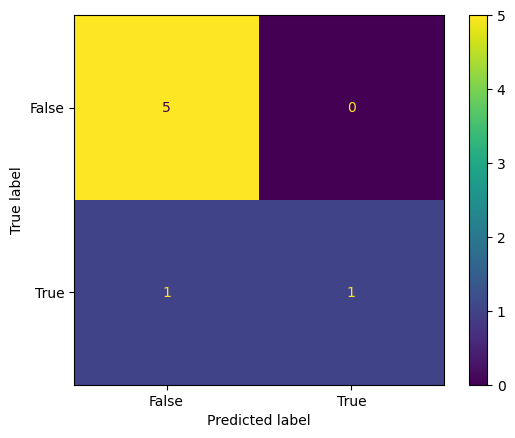

In [38]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test,y_test);

In [40]:
#Task 5.2.18: Determine the depth of the decision tree in model_over.
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

2


In [ ]:

#Task 5.2.19: Create a horizontal bar chart with the 15 most important features for model_over. Be sure to label your x-axis "Gini Importance
#Communicate
#Now that we have a reasonable model, let's graph the importance of each feature.
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(4).plot(kind="barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");




#THIS SHOW THE LIST OF THE IMPORTANT  FEATURES FOR OUR MODEL. FEATURE 48 IS THE MOST IMPORTANT FEATURE FOR OUR MODEL

NameError: name 'model_over' is not defined

In [48]:
#Sometimes communication means sharing a visualization. 
#Other times, it means sharing the actual model you've made so that colleagues can use it on new data or deploy your model into production. 
#First step towards production: saving your model.

#Task 5.2.20: Using a context manager, save your best-performing model to a a file named "model-5-2.pkl".
# Save your model as `"model-5-2.pkl"`
with open("model-5-2.pkl","wb") as f:
    pickle.dump(model_over, f) # take the model and put it into a file.....
    
# b=BINARY MODE
# w=write to
#f= file

In [49]:
# Load `"model-5-2.pkl"`
with open("model-5-2.pkl","rb") as f:
    loaded_model= pickle.load(f) # load the content of f
    

print(loaded_model)
#r=read from
#b=binary mode

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])
